### Задание 1

Закон Бугера–Ламберта–Бера связывает концентрацию $c$ вещества в образце раствора с интенсивностью света, проходящего через этот образец $I_t$ с заданной толщиной слоя вещества $l$ при известной длине волны $\lambda$:

$$
    I_t = I_0 e^ {-\alpha c l}
$$

где $I_0$ - интенсивность света на входе в вещество, $\alpha$ - коэффициент поглощения при длине волны $\lambda$.

После проведения ряда измерений, позволяющих определить часть света, которая прошла сквозь раствор, $I_t /I_0$, коэффициент поглощения $\alpha$ можно найти при помощи линейной аппроксимации:

$$
    y = \ln \left(I_t/I_0\right) = -\alpha c l
$$

Несмотря на то что эта прямая проходит через начало координат ($y = 0$ при $c = 0$), мы будем выполнять подгонку для более общего линейного отношения:

$$
    y = mc + k
$$

где $m = -\alpha l$ с проверкой $k$ на приближение к нулю.

При рассмотрении образца раствора с толщиной слоя $0.8$ см при измерениях были получены данные, приведенные в таблице: отношение $I_t /I_0$ при пяти различных концентрациях:

|C, моль/л|$I_t /I_0$|
|-|-|
|0.4|0.891|
|0.6|0.841|
|0.8|0.783|
|1.0|0.744|
|1.2|0.692|

Используя линейную аппроксимацию, определите коэффициент $\alpha$. Постройте график по табличным данным и результатам аппроксимации.

In [1]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt
from typing import Callable

In [2]:
def linear(
        c: float, 
        params: tuple[float, float]
) -> float:
    m, k = params
    return m * c + k

In [3]:
def residuals(
        params: tuple[float, float],
        x: np.ndarray,
        y: np.ndarray,
        fun: Callable
) -> np.ndarray:
    return y - fun(x, params)

In [4]:
c = np.arange(.4, 1.4, .2)
i = np.array(
    [
        .891, .841, .783, .744, .692
    ]
)
l = .8

In [5]:
params0 = .1, .1
res = least_squares(
    fun=residuals,
    x0=params0,
    args=(
        c,
        np.log(i),
        linear
    )
)

In [6]:
res

     message: `gtol` termination condition is satisfied.
     success: True
      status: 1
         fun: [-1.608e-03  3.446e-03 -5.206e-03  6.509e-03 -3.140e-03]
           x: [-3.140e-01  1.181e-02]
        cost: 4.689340652441786e-05
         jac: [[-4.000e-01 -1.000e+00]
               [-6.000e-01 -1.000e+00]
               [-8.000e-01 -1.000e+00]
               [-1.000e+00 -1.000e+00]
               [-1.200e+00 -1.000e+00]]
        grad: [ 1.819e-10  2.037e-10]
  optimality: 2.0373019937736103e-10
 active_mask: [ 0.000e+00  0.000e+00]
        nfev: 4
        njev: 4

In [7]:
m, k = res.x

In [8]:
alpha = -m / l
alpha

0.3925422304711367

In [9]:
plt.style.use('dark_background')

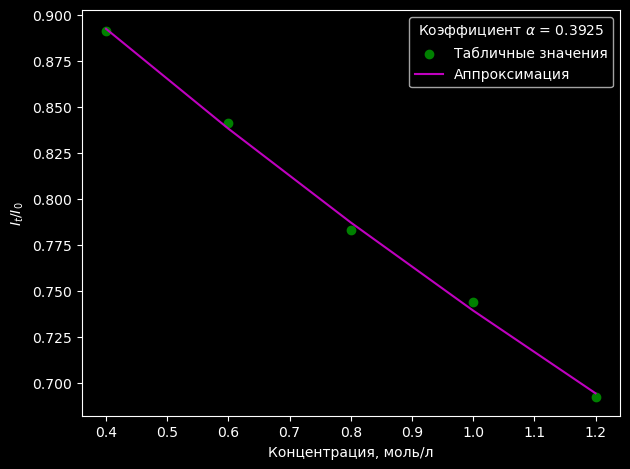

In [10]:
fig, ax = plt.subplots()

ax.scatter(c, i, marker='o', color='g', label='Табличные значения')
ax.plot(c, np.exp(linear(c, res.x)), color='m', label='Аппроксимация')
ax.set_xlabel('Концентрация, моль/л')
ax.set_ylabel(r'$I_t/I_0$')
plt.legend(title=r'Коэффициент $\alpha$ = ' f'{alpha:6.4f}')
plt.tight_layout()

### Задание 2

Дана зависимость давления паров вещества от температуры:

|$\mathrm{T, °C}$|  $p,\ \mathrm{атм}$ |
|-|-|
|$40$ | $0.2453$  |
|$50$ 	| $0.5459$ |
|$60$    | $1.2151$ |
|$70$  | $2.7042$ |
|$80$  | $6.0184$|
|$90$  | $13.3943$|
|$100$  | $29.8096$ |

Определить значения давления паров при $T \in \left[40;\ 100\right]$ с шагом $5\ \mathrm{°C}$, используя:

- Кубический сплайн;
- Одну из аппроксимирующих функций: проверить линейную, степенную и экспоненциальную аппроксимирующие функции, выбрать наиболее подходящую (по значению суммарной ошибки) и провести расчеты с использованием данной функции.

In [11]:
from scipy.interpolate import interp1d

In [12]:
t = np.arange(40, 110, 10)
p = np.array(
    [
        .2453, .5459, 1.2151, 2.7042,
        6.0184, 13.3943, 29.8096
    ]
)
t0, tf = 40, 100
h = 5
t_array = np.arange(t0, tf+h, h)

In [13]:
cubic_spline = interp1d(
    x=t,
    y=p,
    kind='cubic'
)

In [14]:
p_cubic = cubic_spline(t_array)
for pi in p_cubic:
    print(f'{pi:8.4f}')

  0.2453
  0.3709
  0.5459
  0.8131
  1.2151
  1.8085
  2.7042
  4.0417
  6.0184
  8.9285
 13.3943
 20.1199
 29.8096


In [15]:
def power(
        x: float,
        params: tuple[float, float]
) -> float:
    a, b = params
    return a * x ** b

In [16]:
def expo(
        x: float,
        params: tuple[float, float]
) -> float:
    a, b = params
    return a * np.exp(b * x)

In [25]:
params0 = .1, .001
res_power = least_squares(
    fun=residuals,
    x0=params0,
    args=(
        t,
        p,
        power
    )
)
res_power

     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 2.052e-01  3.455e-01  4.692e-01  4.379e-01  8.376e-02
               -4.784e-01  1.592e-01]
           x: [ 1.132e-13  7.209e+00]
        cost: 0.41725441860126133
         jac: [[-3.544e+11 -1.480e-01]
               [-1.770e+12 -7.839e-01]
               ...
               [-1.226e+14 -6.242e+01]
               [-2.620e+14 -1.365e+02]]
        grad: [-7.297e+06 -5.539e-06]
  optimality: 7297043.1328125
 active_mask: [ 0.000e+00  0.000e+00]
        nfev: 199
        njev: 160

In [28]:
params0 = .1, .1
res_expo = least_squares(
    fun=residuals,
    x0=params0,
    args=(
        t,
        p,
        expo
    )
)
res_expo

     message: `gtol` termination condition is satisfied.
     success: True
      status: 1
         fun: [-1.929e-05 -7.044e-05  1.525e-05 -3.235e-05 -5.407e-06
                3.539e-05 -1.105e-05]
           x: [ 1.000e-02  8.000e-02]
        cost: 4.0089007114490634e-09
         jac: [[-2.453e+01 -9.813e+00]
               [-5.460e+01 -2.730e+01]
               ...
               [-1.339e+03 -1.205e+03]
               [-2.981e+03 -2.981e+03]]
        grad: [-1.744e-10 -1.707e-10]
  optimality: 1.7438437499572856e-10
 active_mask: [ 0.000e+00  0.000e+00]
        nfev: 16
        njev: 13

In [31]:
params_expo = res_expo.x
p_expo = expo(t_array, params_expo)
for pi in p_expo:
    print(f'{pi:8.4f}')

  0.2453
  0.3660
  0.5460
  0.8145
  1.2151
  1.8127
  2.7042
  4.0342
  6.0184
  8.9784
 13.3943
 19.9819
 29.8096


### Задание 3

Дана  схема химических превращений:

$$
	A\xleftarrow{k_1}B \xleftrightarrow[k_3]{k_2}C
$$

$$
\begin{align*}
	C_{A_0} &= 0.0 \left(\text{моль/л}\right); &\quad k_1 &= 0.8 \left(c^{-1}\right); \\
	C_{B_0} &= 0.8 \left(\text{моль/л}\right); &\quad k_2 &= 0.96 \left(c^{-1}\right); \\
	C_{C_0} &= 0.2 \left(\text{моль/л}\right); &\quad k_3 &= 0.1 \left(c^{-1}\right).\\
\end{align*}
$$


Решите систему дифференциальных уравнений изменения концентраций веществ во времени при помощи функции `scipy.integrate.solve_ivp()` на отрезке $\left[0;\ 5\right]$ с шагом $h=0.1$. По результатам расчетов постройте зависимость $C\left(t\right)$ для каждого компонента при помощи библиотеки `matplotlib`.

In [32]:
from scipy.integrate import solve_ivp

In [33]:
def kinetic(
        t: float,
        c0: np.ndarray,
        k: np.ndarray
) -> tuple[float, float, float]:
    a, b, c = c0
    k1, k2, k3 = k
    dca_dt = k1 * b
    dcb_dt = -k1 * b - k2 * b + k3 * c
    dcc_dt = k2 * b - k3 * c
    return dca_dt, dcb_dt, dcc_dt

In [44]:
t0, tf = 0, 5
h = .1
time = np.arange(t0, tf+h, h)
c0 = np.array([.0, .8, .2])
k = np.array([.8, .96, .1])

In [45]:
solution = solve_ivp(
    fun=kinetic,
    t_span=(t0, tf),
    y0=c0,
    dense_output=True,
    args=(k,)
)

In [46]:
conc_by_time = solution.sol(time)

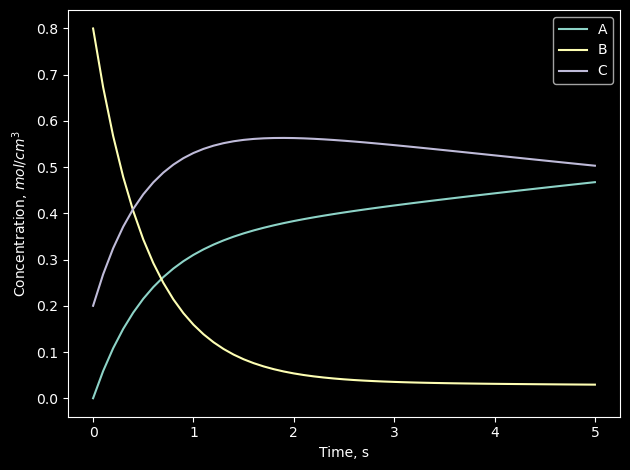

In [47]:
fig, ax = plt.subplots()

names = 'A', 'B', 'C'
for comp, name in zip(conc_by_time, names):
    ax.plot(time, comp, label=name)

ax.set_xlabel('Time, s')
ax.set_ylabel('Concentration, $mol/cm^3$')
ax.legend()
plt.tight_layout()

### Задание 4

Используя функцию `scipy.integrate.quad()` для вычисления значения энтропии воды
при ее нагревании от $400$ до $500 \space \mathrm{K}$ по формуле:

$$
	\Delta S = \eta \int \limits _{400} ^{500} \dfrac{C_v\left(T\right)dT}{T}
$$

$$
	C_v\left(T\right) = R \sum \limits _{j=1} ^{12} A_j \tau^{j-1}
$$

$$
	\tau = 1 - T / T_c
$$

где $T$ - температура, К; $\eta = 3$ - количество молей; $C_v$ - теплоемкость, Дж/(моль К); $R$ - универсальная газовая постоянная; $T_c = 647.126$ - критическая температура, К.

Коэффициенты полинома $A(1)-A(12)$:

|Коэффициент|Значение|
|-|-:|
|$A_1$|7.4305055|
|$A_2$|-24.93618016|
|$A_3$|195.5654567|
|$A_4$|1986.485797|
|$A_5$|-53305.43411|
|$A_6$|505697.1723|
|$A_7$|-2724774.677|
|$A_8$|9167737.673|
|$A_9$|-19622033.78|
|$A_{10}$|25984725.33|
|$A_{11}$|-19419431.35|
|$A_{12}$|6263206.554|

In [52]:
from scipy.integrate import quad
from scipy.constants import R
poly = np.polynomial.Polynomial

In [58]:
def calculate_tau(t: float, tc: float) -> float:
    return 1 - t / tc

In [60]:
def fun(
        t: float,
        tc: float,
        nu,
        cv_approx: Callable
) -> float:
    tau = calculate_tau(t, tc)
    cv = cv_approx(tau)
    return nu * cv / t

In [53]:
coeffs = np.array(
    [
        7.4305055, -24.93618016, 195.5654567, 1986.485797,
        -53305.43411, 505697.1723, -2724774.677, 9167737.673,
        -19622033.78, 25984725.33, -19419431.35, 6263206.554
    ]
)

In [55]:
cv = R * poly(coeffs)

In [56]:
nu = 3
tc = 647.126
t_lim = 400, 500

In [61]:
res = quad(
    func=fun,
    a=t_lim[0],
    b=t_lim[1],
    args=(
        tc,
        nu,
        cv
    )
)
res

(41.307795979236076, 4.586086619266636e-13)